In [ ]:

import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)

from matplotlib import pyplot as plt

import matplotlib.patheffects as path_effects


In [ ]:
import sys
sys.path.append('../../utils')
from utils import umap_refined

In [2]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
  'aPT': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ica': '#e377c2',
 'icb': '#7b4f4b',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'TL': '#ffb500',
 'PC': '#aec7e8',
 'pc': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2',
 'VSM': '#f7b6d2',
 'Unclassified':'#d3d3d3'}

In [3]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

In [5]:
color_dict = {
    'Global RNA Horizontal': '#d62728',
    "scRNA 3' Horizontal": '#1f77b4',
    "scRNA 5' Horizontal": '#ff7f0e',
    'scMultiome-RNA Horizontal': '#2ca02c',
    'scMultiome-ATAC Horizontal': '#8c564b', 
    'scMultiome Vertical': '#9467bd',
    'Global Multimodal Mosaic': '#e377c2',
    'Global Multimodal Diagonal': '#17becf'
}

In [6]:
adata = sc.read('objects/multiVI.h5ad')
adata

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 119744 × 55000
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Deepscore_external', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'Doublet_Detection_doublets_scRNA5p', 'Doublet_Detection_doublets_score_scRNA5p', 'AMULET_doublets', 'AMULET_pval', 'AMULET_qval', 'Doublet_Detection_doublets_snRNA', 'Doublet_Detection_doublets_score_snRNA', 'In_final_obj', 'Deepscore', 'Technology', 'Suspension_type', 'Study', 'Donor_id', 'Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l1_full', 'Deepscore_HCA_l1_Clean_score', 'Deepscore_HCA_l1_Full', 'Deepscore_HCA_l1_Full_score', 'Deepscore_HCA_l3_Clean', 'Deepscore_HCA_l3_Clean_score', 'Deepscore_HCA_l3_Full', 'Deepscore_HCA_l3_Full_score', 'Deepscore_Muto', 'Deepscore_Muto_score', 'leiden_scVI_0.3', 'leiden_scVI_1.4', 'leiden_scVI_2', 'leiden_scVI_6', 'leiden_scVI_10', 'Manual_Annotation_l1'

In [18]:
batch_sample_counts = adata.obs.groupby('batch')['sample'].nunique()

# Display the results
print(batch_sample_counts)

batch
scRNA      18
scRNA5p     4
snATAC     11
snMulti    10
snRNA      10
Name: sample, dtype: int64


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


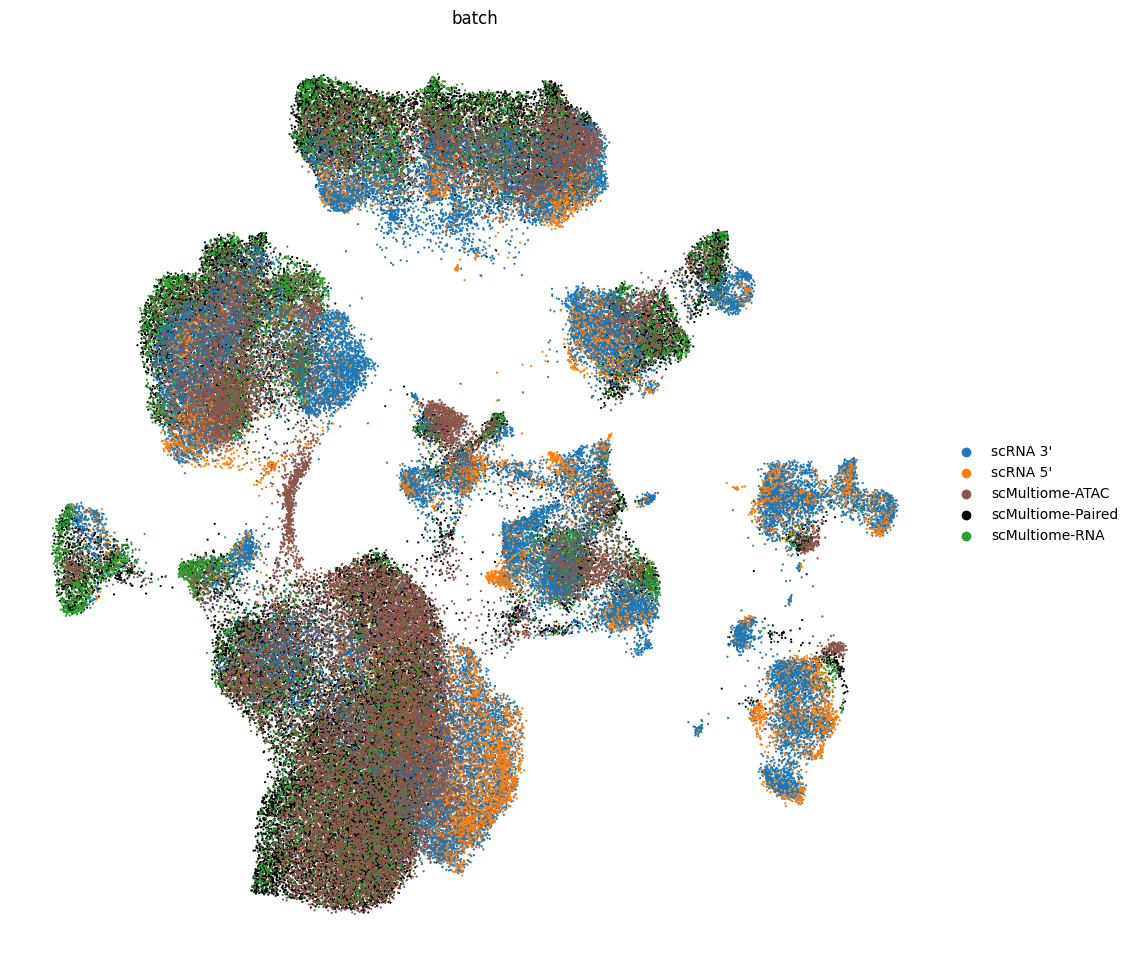

In [112]:
sc.pl.umap(adata, color = 'batch',palette = color_dict, size = 10, frameon=False, show=False)
plt.savefig('figures/MultiVI_batch.png', dpi = 300, bbox_inches = 'tight')

In [40]:
adata = adata[~adata.obs['Deepscore_HCA_l1_Clean'].isin([pd.NA,'NEU'])]
# adata = adata[~adata.obs['Deepscore_HCA_l1_Clean'].isin([])]

Figure size= (6, 6) dpi= 100.0 Scale factor = 18.66211720923831


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


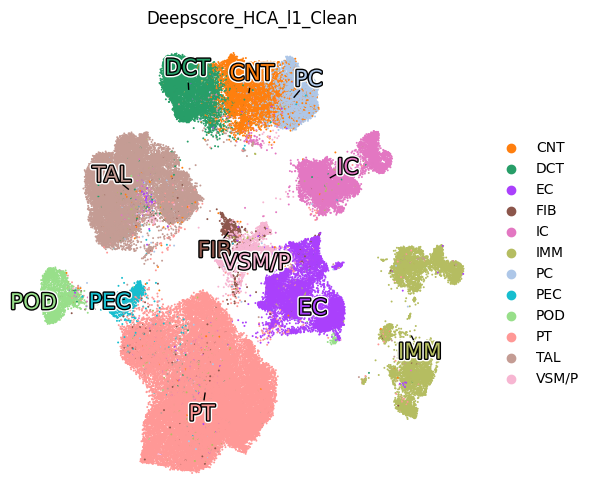

In [57]:
latent = 'MultiVI'
for ann in ['Deepscore_HCA_l1_Clean']:
    adata.uns[f'{ann}_colors'] = [l1_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = f'X_umap',
                var = ann,
                size= 8,
                label_size = 15 * (50/len(adata.obs[ann].unique())),
                width_in_inches = 6,
                height_in_inches = 6,
                max_iterations=100)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAP_{ann}_{latent}_small.png',  bbox_inches='tight', dpi=300)

Figure size= (14, 14) dpi= 100.0 Scale factor = 43.54494015488939


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


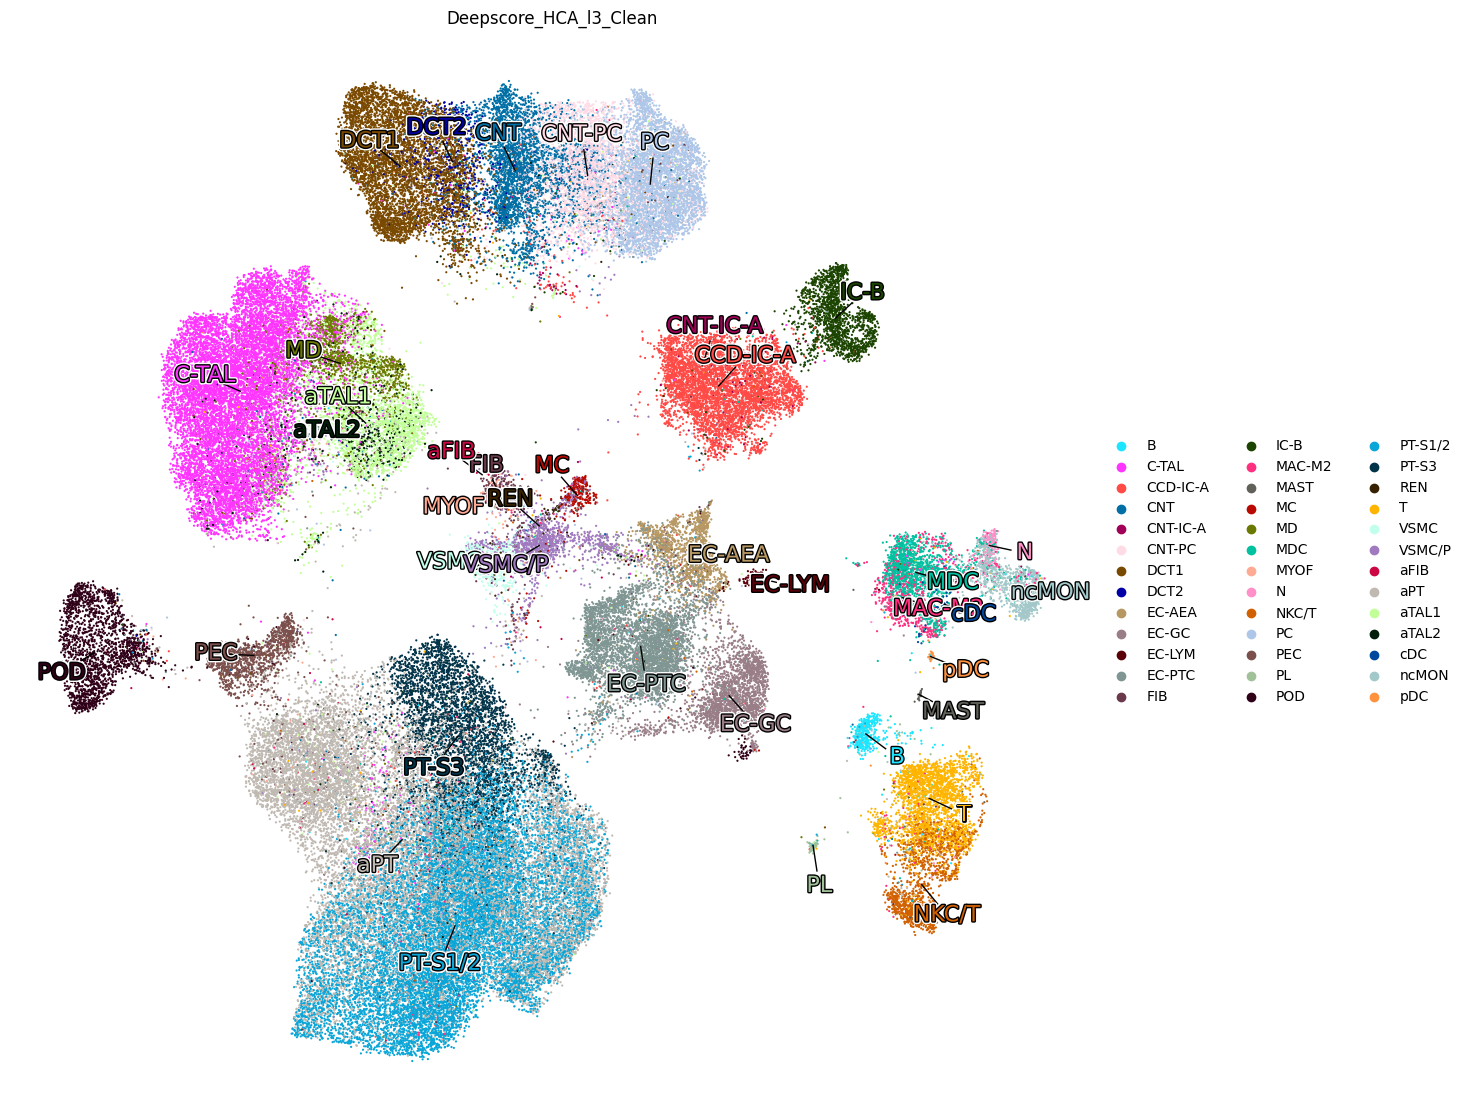

In [79]:
latent = 'MultiVI'
for ann in ['Deepscore_HCA_l3_Clean']:
    adata.uns[f'{ann}_colors'] = [l3_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = f'X_umap',
                var = ann,
                size= 10,
                label_size = 50 * (50/len(adata.obs[ann].unique())),
                width_in_inches = 14,
                height_in_inches = 14,
                max_iterations=10)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAP_{ann}_{latent}_big.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAP_{ann}_{latent}_big.svg',  bbox_inches='tight', dpi=200)